### New_York_City_Taxi_Fare_Prediction

In [1]:
import pandas as pd

In [9]:
df=pd.read_csv('data/taxifare.csv')

In [10]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df.shape

(120000, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [ ]:
## Feature eng. with respect to datetime

In [12]:
#convert to datetime and make it new york time.
import datetime
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])-datetime.timedelta(hours=4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 7.3 MB


In [14]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [20]:
#Get different parts of datetime and include it as a feature

df['Year']=df['pickup_datetime'].dt.year
df['Month']=df['pickup_datetime'].dt.month
df['Day']=df['pickup_datetime'].dt.day
df['Hours']=df['pickup_datetime'].dt.hour
df['Minutes']=df['pickup_datetime'].dt.minute

In [17]:
# generally we have pickup time range where we have lot of pickups, like morning hours
#can we have some feature to denote that AM/PM or 0/1

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
119995    2010
119996    2010
119997    2010
119998    2010
119999    2010
Name: Year, Length: 120000, dtype: int64

In [21]:
import numpy as np

In [23]:
df['mor_night']=np.where(df['Hours']<12,0,1)

In [24]:
# we can drop pickupdatetime feature now as we have got all info from that feature

In [26]:
df.drop('pickup_datetime', axis=1,inplace=True)

In [27]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,mor_night
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [32]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.html
#https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points


def haversine(df):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    
    lat1=np.radians(df['pickup_latitude'])
    lat2=np.radians(df['dropoff_latitude'])
    
    dlat=np.radians(df['dropoff_latitude']-df['pickup_latitude'])
    dlon=np.radians(df['dropoff_longitude']-df['pickup_longitude'])

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r


In [33]:
df['Total_distance']=haversine(df)

In [34]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,mor_night,Total_distance
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1,7.231321


In [35]:
df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1,inplace=True)

In [36]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mor_night,Total_distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


### Storing data in MongoDB

In [37]:
import json
records=json.loads(df.T.to_json()).values()

In [38]:
import pymongo
client=pymongo.MongoClient('mongodb://127.0.0.1:27017/')
db=client['newyorktaxi']
col=db['rides']

In [39]:
col.insert_many(records)

### Regression Model

In [40]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [69]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mor_night,Total_distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


In [70]:
df.to_csv('final_data.csv')

In [41]:
###Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

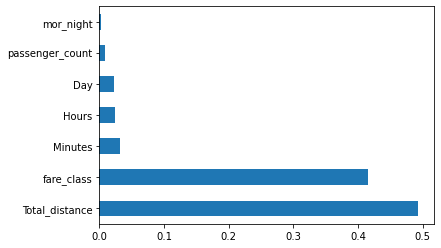

In [43]:
### Plot feature importance graph for better visualization
%matplotlib inline
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [44]:
X.head()

,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mor_night,Total_distance
0,0,1,2010,4,19,4,17,0,2.126312
1,0,1,2010,4,17,11,43,0,1.392307
2,1,2,2010,4,17,7,23,0,3.326763
3,0,1,2010,4,11,17,25,1,1.864129
4,1,1,2010,4,16,22,19,1,7.231321


In [45]:
y.head()

0     6.5
1     6.9
2    10.1
3     8.9
4    19.7
Name: fare_amount, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)


In [48]:
import xgboost

In [49]:
regressor=xgboost.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
y_pred=regressor.predict(X_test)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\navin.prasad\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

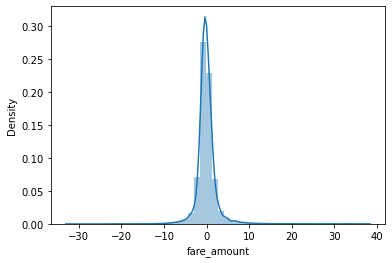

In [54]:
sns.distplot(y_test-y_pred)

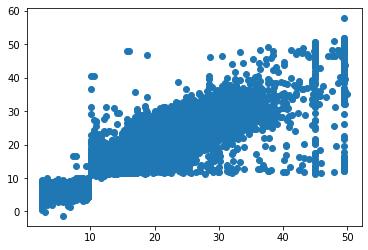

In [55]:
plt.scatter(y_test,y_pred)

In [56]:
from sklearn import metrics

print('R Square',np.sqrt(metrics.r2_score(y_test,y_pred)))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R Square 0.9400762643333571
MAE 1.4025255433477628
MSE 6.6505615409924435
RMSE 2.578868267475569


In [57]:
# R Square =0.9400762643333571 which is very good

### Hyper parameter Tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
#Number of Trees in XGBoost
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
learning_rate=[0.05,0.1,0.2,0.3,0.5,0.6]
max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=6)]
subsample=[0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]

In [60]:
random_grid={'n_estimators':n_estimators,
             'learning_rate':learning_rate,
             'max_depth':max_depth,
             'subsample':subsample,
             'min_child_weight':min_child_weight}

In [64]:
regressor=xgboost.XGBRegressor()

In [67]:
xg_random=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,
                             scoring='neg_mean_squared_error',n_iter=5,cv=5,verbose=2,random_state=42,n_jobs=-1)

In [68]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
    

In [71]:
xg_random.be

<class 'AttributeError'>: 'RandomizedSearchCV' object has no attribute 'best_param_'

In [ ]:
y_pred=xg_random.predict(X_test)

In [ ]:
sns.distplot(y_test,y_pred)

In [ ]:
plt.scatter(y_test,y_pred)